In [2]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from networkx.algorithms.community import greedy_modularity_communities
import community
from collections import defaultdict
from math import isnan

In [3]:
def convert_graph(G, from_type, to_type):
    
    # input
    if from_type == 'networkx':
        #import networkx as nx
        node_list = list(G.nodes)
        edge_list = list(G.edges)
        is_directed = G.is_directed()
    
    elif from_type == "graph-tool":
        #import graph_tool.all as gt
        node_list = list(G.get_vertices())
        edge_list = list(G.get_edges())
        is_directed = G.is_directed()
    
    # output
    if to_type == "networkx":
        #import networkx as nx
        if is_directed == True:
            G_new = nx.DiGraph()
        else:
            G_new = nx.Graph()
        G_new.add_nodes_from(node_list)
        G_new.add_edges_from(edge_list)
    
    elif to_type == "graph-tool":
        #import graph_tool.all as gt
        if is_directed == True:
            G_new = gt.Graph()
        else:
            G_new = gt.Graph(directed = False)
        for node in node_list:
            G_new.add_vertex()
        for edge in edge_list:
            G_new.add_edge(edge[0], edge[1])
    
    return G_new

In [4]:
b_edges = pd.read_stata('baseline_edges.dta')

In [5]:
covars = pd.read_stata('covars.dta')
covars = covars.set_index('stdid')

In [6]:
covars.head()

,classid,gender,reservation,caste,religion,stu_merge
stdid,,,,,,
IR001CS1001,IR001CS1,Male,Non-reservation,General,Hinduism,Baseline and Endline both
IR001CS1002,IR001CS1,Male,Non-reservation,General,Hinduism,Baseline and Endline both
IR001CS1003,IR001CS1,Male,Reservation,OBC,Hinduism,Baseline and Endline both
IR001CS1004,IR001CS1,Male,Reservation,OBC,Hinduism,Baseline and Endline both
IR001CS1005,IR001CS1,Female,Non-reservation,General,Hinduism,Baseline and Endline both


In [7]:
b_nodes = pd.read_stata('baseline_nodes.dta')
G1 = nx.from_pandas_edgelist(b_nodes, 'stdid', 'b_classmateid', create_using = nx.DiGraph())
nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 17699\nNumber of edges: 17699\nAverage in degree:   1.0000\nAverage out degree:   1.0000'

In [8]:
G1.remove_edges_from(list(G1.edges()))
nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 17699\nNumber of edges: 0\nAverage in degree:   0.0000\nAverage out degree:   0.0000'

In [9]:
G1_temp = nx.from_pandas_edgelist(b_edges, 'stdid', 'b_classmateid', create_using = nx.DiGraph())
nx.info(G1_temp)

'Name: \nType: DiGraph\nNumber of nodes: 17368\nNumber of edges: 115420\nAverage in degree:   6.6456\nAverage out degree:   6.6456'

In [10]:
G1.add_edges_from(G1_temp.edges())
G1_temp.clear()
nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 17699\nNumber of edges: 115420\nAverage in degree:   6.5213\nAverage out degree:   6.5213'

In [11]:
nx.set_node_attributes(G1, covars.gender.to_dict(), 'gender')
nx.set_node_attributes(G1, covars.religion.to_dict(), 'religion')
nx.set_node_attributes(G1, covars.caste.to_dict(), 'caste')
nx.set_node_attributes(G1, covars.reservation.to_dict(), 'reservation')
nx.set_node_attributes(G1, covars.classid.to_dict(), 'classid')

In [12]:
b_classids = np.unique(np.array(list(nx.get_node_attributes(G1,'classid').values()))).tolist()

In [18]:
subclass = {}
for classid in b_classids:
    subclass[classid] = nx.attribute_assortativity_coefficient(G1.subgraph(covars[covars['classid'] == classid].index.tolist()),'gender')
subclass = {k: subclass[k] for k in subclass if not isnan(subclass[k])}
print("Min:", min(subclass, key = subclass.get))
print("Max:", max(subclass, key = subclass.get))
sorted(subclass, key = subclass.get)

Min: IR053EE3
Max: IR032CS3


['IR053EE3',
 'IR019EE3',
 'IR051EE1',
 'IR001EE3',
 'IR007EE1',
 'IR036CS1',
 'IR008CS3',
 'IR008EE3',
 'IR041EE3',
 'IR019EE1',
 'IR013EE3',
 'IR005EE3',
 'IR004EE3',
 'IR020EE3',
 'IR042CS1',
 'IR010EE1',
 'IR020CS1',
 'IR001CS3',
 'IR017CS1',
 'IR010CS3',
 'IR001CS1',
 'IR020CS3',
 'IR019CS3',
 'IR051CS3',
 'IR008CS1',
 'IR002CS3',
 'IR012EE3',
 'IR020EE1',
 'IR002CS1',
 'IR053CS3',
 'IR011EE1',
 'IR003EE3',
 'IR004CS3',
 'IR004CS1',
 'IR025CS3',
 'IR021CS3',
 'IR021EE3',
 'IR003CS3',
 'IR026EE1',
 'IR028EE3',
 'IR053CS1',
 'IR007EE3',
 'IR011EE3',
 'IR014EE3',
 'IR002EE1',
 'IR005CS3',
 'IR010EE3',
 'IR005EE1',
 'IR047EE3',
 'IR029EE1',
 'IR047CS1',
 'IR015CS3',
 'IR005CS1',
 'IR041EE1',
 'IR012CS3',
 'IR006CS1',
 'IR047CS3',
 'IR019CS1',
 'IR016CS3',
 'IR023CS3',
 'IR021EE1',
 'IR001EE1',
 'IR013CS3',
 'IR014CS3',
 'IR033CS3',
 'IR029EE3',
 'IR016CS1',
 'IR010CS1',
 'IR003EE1',
 'IR003CS1',
 'IR011CS3',
 'IR006CS3',
 'IR023EE3',
 'IR052CS3',
 'IR031CS1',
 'IR015CS1',
 'IR007CS3',

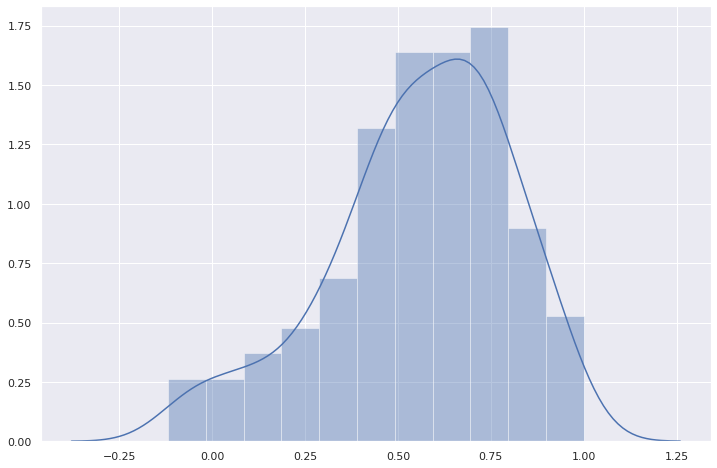

In [14]:
sns.set()
dist_list = [x for x in list(subclass.values()) if str(x) != 'nan']
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.distplot(dist_list, ax = ax)

In [15]:
#fig, ax = plt.subplots(1, figsize=(12, 8))
#sns.barplot(x  = list(subclass.keys()), y = list(subclass.values()), ax = ax)

Assortativity coefficient: -0.06741573033707893


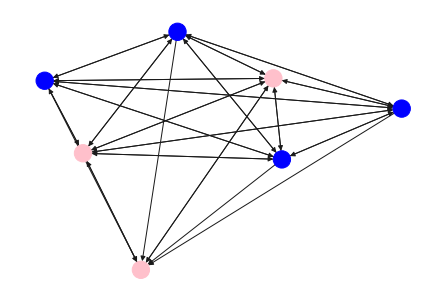

In [39]:
# low assortativity
low = G1.subgraph(covars[covars['classid'] == "IR051EE1"].index.tolist())
values = nx.get_node_attributes(low,'gender')
color_map = []
for node in low:
    if values[node] == 'Male':
        color_map.append('blue')
    else:
        color_map.append('pink')
nx.draw_spring(low, node_color = color_map, with_labels = False)
print("Assortativity coefficient:", nx.attribute_assortativity_coefficient(low,'gender'))

Assortativity coefficient: 0.9609829300318891


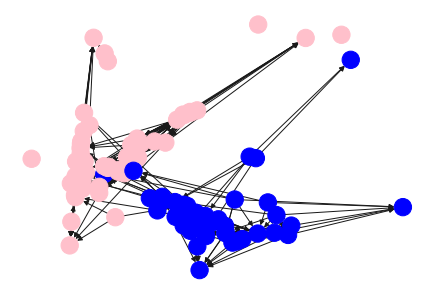

In [23]:
# high assortativity
high = G1.subgraph(covars[covars['classid'] == "IR046EE1"].index.tolist())
values = nx.get_node_attributes(high,'gender')
color_map = []
for node in high:
    if values[node] == 'Male':
        color_map.append('blue')
    else:
        color_map.append('pink')
nx.draw_spring(high, node_color = color_map, with_labels = False)
print("Assortativity coefficient:", nx.attribute_assortativity_coefficient(high,'gender'))

In [24]:
#nx.write_gml(low, "h1_low.gml")
nx.write_gml(high, "h1_high.gml")

In [25]:
gtG = gt.load_graph("h1_high.gml")

In [36]:
motifs, zscores = gt.motif_significance(gtG, 3)

In [37]:
motifs, zscores

((<Graph object, directed, with 3 vertices and 2 edges at 0x7fcf79279940>,
  <Graph object, directed, with 3 vertices and 2 edges at 0x7fcf792796d8>,
  <Graph object, directed, with 3 vertices and 2 edges at 0x7fcf79279390>,
  <Graph object, directed, with 3 vertices and 3 edges at 0x7fcf79279358>,
  <Graph object, directed, with 3 vertices and 3 edges at 0x7fcf792798d0>,
  <Graph object, directed, with 3 vertices and 3 edges at 0x7fcf79279b00>,
  <Graph object, directed, with 3 vertices and 3 edges at 0x7fcf79280400>,
  <Graph object, directed, with 3 vertices and 4 edges at 0x7fcf79279860>,
  <Graph object, directed, with 3 vertices and 4 edges at 0x7fcf79279fd0>,
  <Graph object, directed, with 3 vertices and 4 edges at 0x7fcf79283710>,
  <Graph object, directed, with 3 vertices and 4 edges at 0x7fcf792832e8>,
  <Graph object, directed, with 3 vertices and 5 edges at 0x7fcf79283c50>,
  <Graph object, directed, with 3 vertices and 6 edges at 0x7fcf79283f60>),
 [-21.593237394713626,
 

<Graph object, directed, with 3 vertices and 4 edges at 0x7fcf79279860> 34.57738730259904


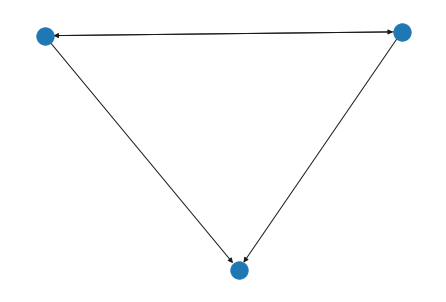

In [43]:
z_max = 0
z_min = 0
for z in zscores:
   if z > z_max:
        z_max = z

for z in zscores:
    if z < z_min:
        z_min = z
        
for i in range(len(zscores)):
    if zscores[i] == z_max:
        print(motifs[i], zscores[i])
        nx.draw(convert_graph(motifs[i], 'graph-tool', 'networkx'))

<Graph object, directed, with 3 vertices and 2 edges at 0x7fcf79279940> -21.593237394713626


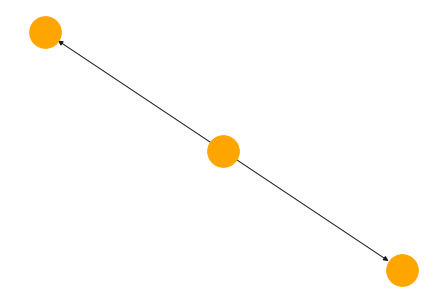

In [54]:
for i in range(len(zscores)):
    if zscores[i] == z_min:
        print(motifs[i], zscores[i])
        nx.draw_spring(convert_graph(motifs[i], 'graph-tool', 'networkx'), node_size = 1000, node_color = 'orange')

In [34]:
#zscores = StandardScaler().fit_transform(np.array(zscores).reshape(-1, 1))

In [33]:
#pd.DataFrame({'motif':list(motifs), 'z_score': zscores.reshape(-1).tolist()}).sort_values(by = 'z_score', ascending = False)

In [17]:
nx.attribute_assortativity_coefficient(G1,'gender')

0.6951095831510672

In [18]:
nx.attribute_assortativity_coefficient(G1,'caste')

0.13081461261375435

In [19]:
nx.attribute_assortativity_coefficient(G1,'reservation')

0.16714629065221315

In [20]:
nx.attribute_assortativity_coefficient(G1,'religion')

0.22354066905409042

In [21]:
nx.number_of_isolates(G1)

331

In [ ]:
#nx.write_gml(G1, "baseline.gml")

In [ ]:
# plot outdegree distribution on log scale (not useful due to upper bound of 10)
out_list = list(G1.out_degree())
out_deg_list = [t[1] for t in out_list]

pairs = []
for i in range(min(out_deg_list), max(out_deg_list) + 1):
    if i in out_deg_list and i != 0:
        tup = [i, out_deg_list.count(i)]
        pairs.append(tup)

pairs = np.log10(np.array(pairs))
x = pairs[:,0]
y = pairs[:,1]
plt.plot(x, y)

In [ ]:
# plot indegree distribution
in_list = list(G1.in_degree())
in_deg_list = [t[1] for t in in_list]

pairs = []
for i in range(min(in_deg_list), max(in_deg_list) + 1):
    if i in in_deg_list and i != 0:
        tup = [i, in_deg_list.count(i)]
        pairs.append(tup)

pairs = np.array(pairs)
x1 = pairs[:,0]
y1 = pairs[:,1]
plt.xlabel("Indegree")
plt.ylabel("Node Frequency")
plt.title("Indegree distribution - baseline")
plt.plot(x1, y1)

In [ ]:
# indegree on log scale
pairs = np.log10(np.array(pairs))
x2 = pairs[:,0]
y2 = pairs[:,1]
plt.xlabel("Log (base 10) of Indegree")
plt.ylabel("Log (base 10) of Node Frequency")
plt.title("Indegree distribution - baseline")
plt.plot(x2, y2)

In [ ]:
#G1.remove_nodes_from(list(nx.isolates(G1)))
#nx.number_of_isolates(G)
#nx.info(G1)

In [22]:
e_edges = pd.read_stata('endline_edges.dta')

In [23]:
e_nodes = pd.read_stata('endline_nodes.dta')
G2 = nx.from_pandas_edgelist(e_nodes, 'stdid', 'e_classmateid', create_using = nx.DiGraph())
nx.info(G2)

'Name: \nType: DiGraph\nNumber of nodes: 18490\nNumber of edges: 18490\nAverage in degree:   1.0000\nAverage out degree:   1.0000'

In [24]:
G2.remove_edges_from(list(G2.edges()))
G2_temp = nx.from_pandas_edgelist(e_edges, 'stdid', 'e_classmateid', create_using = nx.DiGraph())
nx.info(G2_temp)

'Name: \nType: DiGraph\nNumber of nodes: 18332\nNumber of edges: 138251\nAverage in degree:   7.5415\nAverage out degree:   7.5415'

In [25]:
G2.add_edges_from(G2_temp.edges())
G2_temp.clear()
nx.info(G2)

'Name: \nType: DiGraph\nNumber of nodes: 18490\nNumber of edges: 138251\nAverage in degree:   7.4771\nAverage out degree:   7.4771'

In [26]:
nx.set_node_attributes(G2, covars.gender.to_dict(), 'gender')
nx.set_node_attributes(G2, covars.religion.to_dict(), 'religion')
nx.set_node_attributes(G2, covars.caste.to_dict(), 'caste')
nx.set_node_attributes(G2, covars.reservation.to_dict(), 'reservation')
nx.set_node_attributes(G2, covars.classid.to_dict(), 'classid')

In [27]:
classids = np.unique(np.array(list(nx.get_node_attributes(G2,'classid').values()))).tolist()
subclass = {}
for classid in classids:
    subclass[classid] = nx.attribute_assortativity_coefficient(G2.subgraph(covars[covars['classid'] == classid].index.tolist()),'gender')
#subclass
print("Min:", min(subclass, key = subclass.get))
print("Max:", max(subclass, key = subclass.get))

Min: IR053EE3
Max: IR043EE1


Assortativity coefficient: -0.26229508196721313


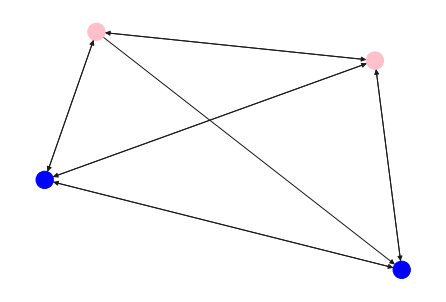

In [28]:
# low assortativity
h2 = G2.subgraph(covars[covars['classid'] == "IR053EE3"].index.tolist())
values = nx.get_node_attributes(h2,'gender')
color_map = []
for node in h2:
    if values[node] == 'Male':
        color_map.append('blue')
    else:
        color_map.append('pink')
nx.draw_spring(h2, node_color = color_map, with_labels = False)
print("Assortativity coefficient:", nx.attribute_assortativity_coefficient(h2,'gender'))

In [1]:
# high assortativity
h2 = G2.subgraph(covars[covars['classid'] == "IR043EE1"].index.tolist())
values = nx.get_node_attributes(h2,'gender')
color_map = []
for node in h2:
    if values[node] == 'Male':
        color_map.append('blue')
    else:
        color_map.append('pink')
nx.draw_spring(h2, node_color = color_map, with_labels = False)
print("Assortativity coefficient:", nx.attribute_assortativity_coefficient(h2,'gender'))

NameError: name 'G2' is not defined

In [30]:
nx.attribute_assortativity_coefficient(G2,'gender')

0.6759154568477056

In [31]:
nx.attribute_assortativity_coefficient(G2,'caste')

0.12360245218377762

In [32]:
nx.attribute_assortativity_coefficient(G2,'reservation')

0.15520279843333035

In [33]:
nx.attribute_assortativity_coefficient(G2,'religion')

0.21855880659209628

In [34]:
nx.number_of_isolates(G2)

158

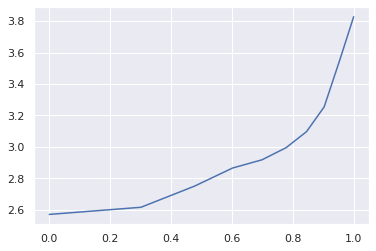

In [35]:
# outdegree - endline
out_list = list(G2.out_degree())
out_deg_list = [t[1] for t in out_list]

pairs = []
for i in range(min(out_deg_list), max(out_deg_list) + 1):
    if i in out_deg_list and i != 0:
        tup = [i, out_deg_list.count(i)]
        pairs.append(tup)

pairs = np.log10(np.array(pairs))
x = pairs[:,0]
y = pairs[:,1]
plt.plot(x, y)

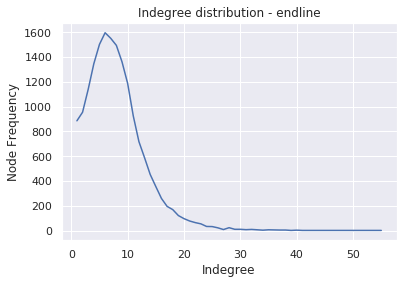

In [36]:
# plot indegree distribution
in_list = list(G2.in_degree())
in_deg_list = [t[1] for t in in_list]

pairs = []
for i in range(min(in_deg_list), max(in_deg_list) + 1):
    if i in in_deg_list and i != 0:
        tup = [i, in_deg_list.count(i)]
        pairs.append(tup)

pairs = np.array(pairs)
x1 = pairs[:,0]
y1 = pairs[:,1]
plt.xlabel("Indegree")
plt.ylabel("Node Frequency")
plt.title("Indegree distribution - endline")
plt.plot(x1, y1)

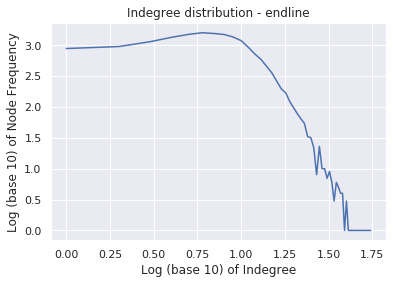

In [37]:
pairs = np.log10(np.array(pairs))
x2 = pairs[:,0]
y2 = pairs[:,1]
plt.xlabel("Log (base 10) of Indegree")
plt.ylabel("Log (base 10) of Node Frequency")
plt.title("Indegree distribution - endline")
plt.plot(x2, y2)

Final analysis

Text(0.5, 0, 'Homophily')

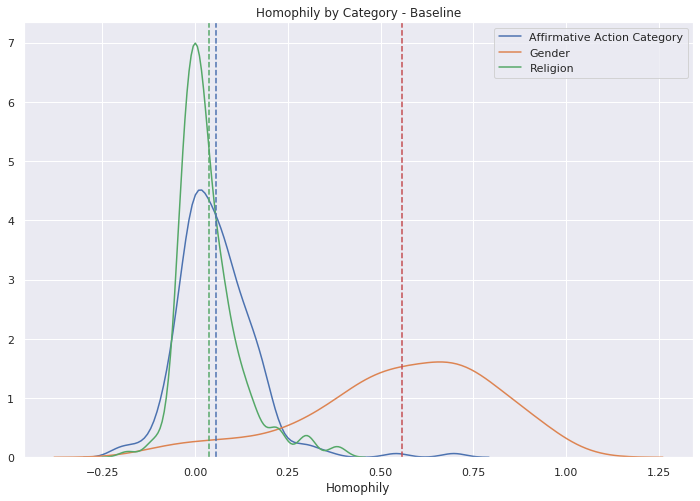

In [111]:
# homophily by category - baseline
b_classids = np.unique(np.array(list(nx.get_node_attributes(G1,'classid').values()))).tolist()
b_subclass1 = {}
for classid in b_classids:
    b_subclass1[classid] = nx.attribute_assortativity_coefficient(G1.subgraph(covars[covars['classid'] == classid].index.tolist()),'reservation')
b_subclass2 = {}
for classid in b_classids:
    b_subclass2[classid] = nx.attribute_assortativity_coefficient(G1.subgraph(covars[covars['classid'] == classid].index.tolist()),'gender')
b_subclass3 = {}
for classid in b_classids:
    b_subclass3[classid] = nx.attribute_assortativity_coefficient(G1.subgraph(covars[covars['classid'] == classid].index.tolist()),'religion')
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.distplot(list(b_subclass1.values()), ax = ax, hist = False, label = 'Affirmative Action Category')
sns.distplot(list(b_subclass2.values()), ax = ax, hist = False, label = 'Gender')
sns.distplot(list(b_subclass3.values()), ax = ax, hist = False, label = 'Religion')
plt.axvline(np.array([x for x in b_subclass1.values() if str(x) != 'nan']).mean(), color='b', linestyle='--')
plt.axvline(np.array([x for x in b_subclass2.values() if str(x) != 'nan']).mean(), color='r', linestyle='--')
plt.axvline(np.array([x for x in b_subclass3.values() if str(x) != 'nan']).mean(), color='g', linestyle='--')
plt.title('Homophily by Category - Baseline')
plt.xlabel('Homophily')

Text(0.5, 0, 'Homophily')

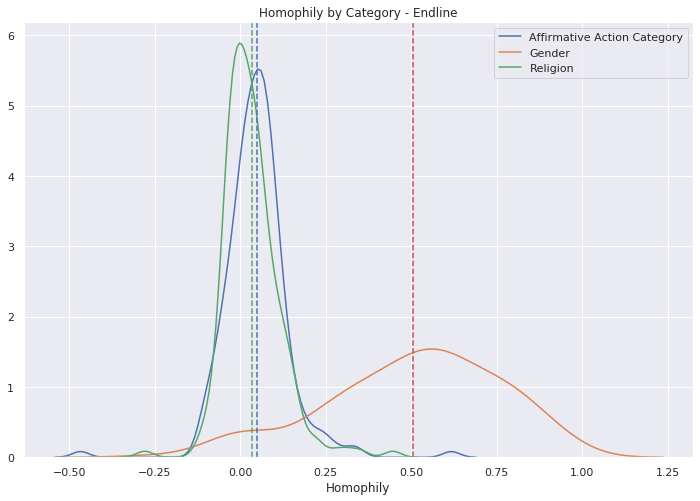

In [110]:
# homophily by category - endline
e_classids = np.unique(np.array(list(nx.get_node_attributes(G2,'classid').values()))).tolist()
e_subclass1 = {}
for classid in e_classids:
    e_subclass1[classid] = nx.attribute_assortativity_coefficient(G2.subgraph(covars[covars['classid'] == classid].index.tolist()),'reservation')
e_subclass2 = {}
for classid in e_classids:
    e_subclass2[classid] = nx.attribute_assortativity_coefficient(G2.subgraph(covars[covars['classid'] == classid].index.tolist()),'gender')
e_subclass3 = {}
for classid in e_classids:
    e_subclass3[classid] = nx.attribute_assortativity_coefficient(G2.subgraph(covars[covars['classid'] == classid].index.tolist()),'religion')
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.distplot(list(e_subclass1.values()), ax = ax, hist = False, label = 'Affirmative Action Category')
sns.distplot(list(e_subclass2.values()), ax = ax, hist = False, label = 'Gender')
sns.distplot(list(e_subclass3.values()), ax = ax, hist = False, label = 'Religion')
plt.axvline(np.array([x for x in e_subclass1.values() if str(x) != 'nan']).mean(), color='b', linestyle='--')
plt.axvline(np.array([x for x in e_subclass2.values() if str(x) != 'nan']).mean(), color='r', linestyle='--')
plt.axvline(np.array([x for x in e_subclass3.values() if str(x) != 'nan']).mean(), color='g', linestyle='--')
plt.title('Homophily by Category - Endline')
plt.xlabel('Homophily')

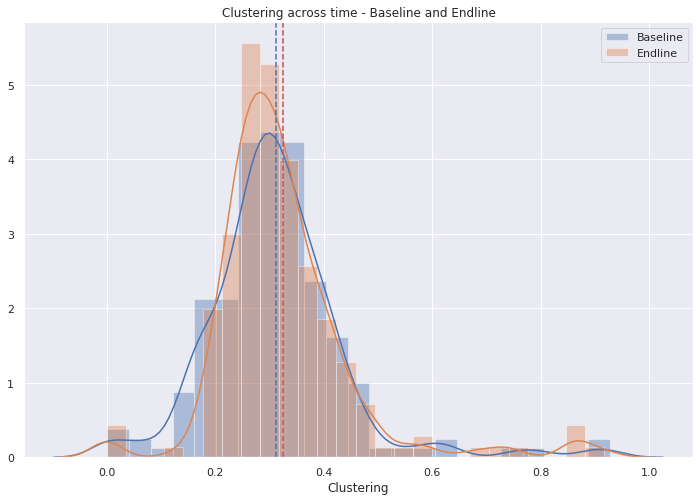

In [84]:
# distribution of clustering - baseline and endline
b_subclass4 = {}
for classid in b_classids:
    b_subclass4[classid] = nx.average_clustering(G1.subgraph(covars[covars['classid'] == classid].index.tolist()))
e_subclass4 = {}
for classid in e_classids:
    e_subclass4[classid] = nx.average_clustering(G2.subgraph(covars[covars['classid'] == classid].index.tolist()))
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.distplot(list(b_subclass4.values()), ax = ax, hist = True, label = 'Baseline')
sns.distplot(list(e_subclass4.values()), ax = ax, hist = True, label = 'Endline')
plt.axvline(np.array(list(b_subclass4.values())).mean(), color='b', linestyle='--')
plt.axvline(np.array(list(e_subclass4.values())).mean(), color='r', linestyle='--')
plt.title('Clustering across time - Baseline and Endline')
plt.xlabel('Clustering')
plt.legend()

In [43]:
# unsupervised clustering
#h1 = G1.subgraph(covars[covars['classid'] == "IR046EE1"].index.tolist()).to_undirected()
#partition = community.best_partition(h1)
#values = [partition.get(node) for node in h1.nodes()]
#nx.draw(h1, cmap=plt.get_cmap('jet'), node_color = values, node_size=300, with_labels=False)
#sorted(h1.nodes)

In [44]:
#h1 = G1.subgraph(covars[covars['classid'] == "IR046EE1"].index.tolist())
#values = nx.get_node_attributes(h1,'gender')
#color_map = []
#for node in h1:
#    if values[node] == 'Male':
#        color_map.append('blue')
#    else:
#        color_map.append('pink')
#nx.draw_spring(h1, node_color = color_map, with_labels = False)
#print("Assortativity coefficient:", nx.attribute_assortativity_coefficient(h1,'gender'))

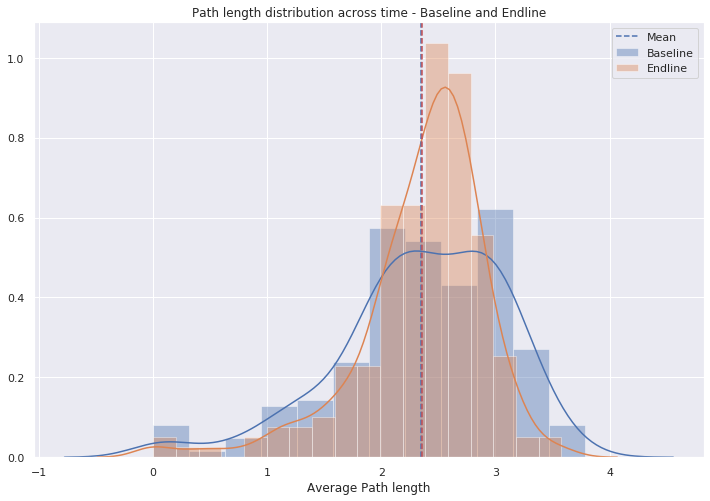

In [86]:
# path length distribution - baseline and endline
b_subclass5 = {}
for classid in b_classids:
    G1_maxwcc = list(max(nx.weakly_connected_components(G1.subgraph(covars[covars['classid'] == classid].index.tolist())), key = len))
    b_subclass5[classid] = nx.average_shortest_path_length(G1.subgraph(G1_maxwcc))
e_subclass5 = {}
for classid in e_classids:
    G2_maxwcc = list(max(nx.weakly_connected_components(G2.subgraph(covars[covars['classid'] == classid].index.tolist())), key = len))
    e_subclass5[classid] = nx.average_shortest_path_length(G2.subgraph(G2_maxwcc))
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.distplot(list(b_subclass5.values()), ax = ax, hist = True, label = 'Baseline')
sns.distplot(list(e_subclass5.values()), ax = ax, hist = True, label = 'Endline')
plt.axvline(np.array(list(b_subclass5.values())).mean(), color='b', linestyle='--', label = 'Mean')
plt.axvline(np.array(list(e_subclass5.values())).mean(), color='r', linestyle='--')
plt.title('Path length distribution across time - Baseline and Endline')
plt.xlabel('Average Path length')
plt.legend()

2.349881421956193